In [6]:
import pandas as pd

# Step 1: 读取 Excel 文件
excel_file = 'data.xlsx'  # 请替换为您的实际文件路径
df = pd.read_excel(excel_file)

# Step 2: 保存为 CSV 文件
csv_file = 'data.csv'
df.to_csv(csv_file, index=False)

print(f"成功将 '{excel_file}' 转换为 '{csv_file}'")


成功将 'data.xlsx' 转换为 'data.csv'


成功读取文件：data.xlsx
筛选前数据行数: 2999
筛选后数据行数: 2457
警告：以下神经元列在数据中未找到并将被忽略：{'n19', 'n11'}
使用的神经元列数：60
未发现缺失值。
每个神经元的平均值计算完成。
平均值已保存到 'neuron_means_Exp.csv'


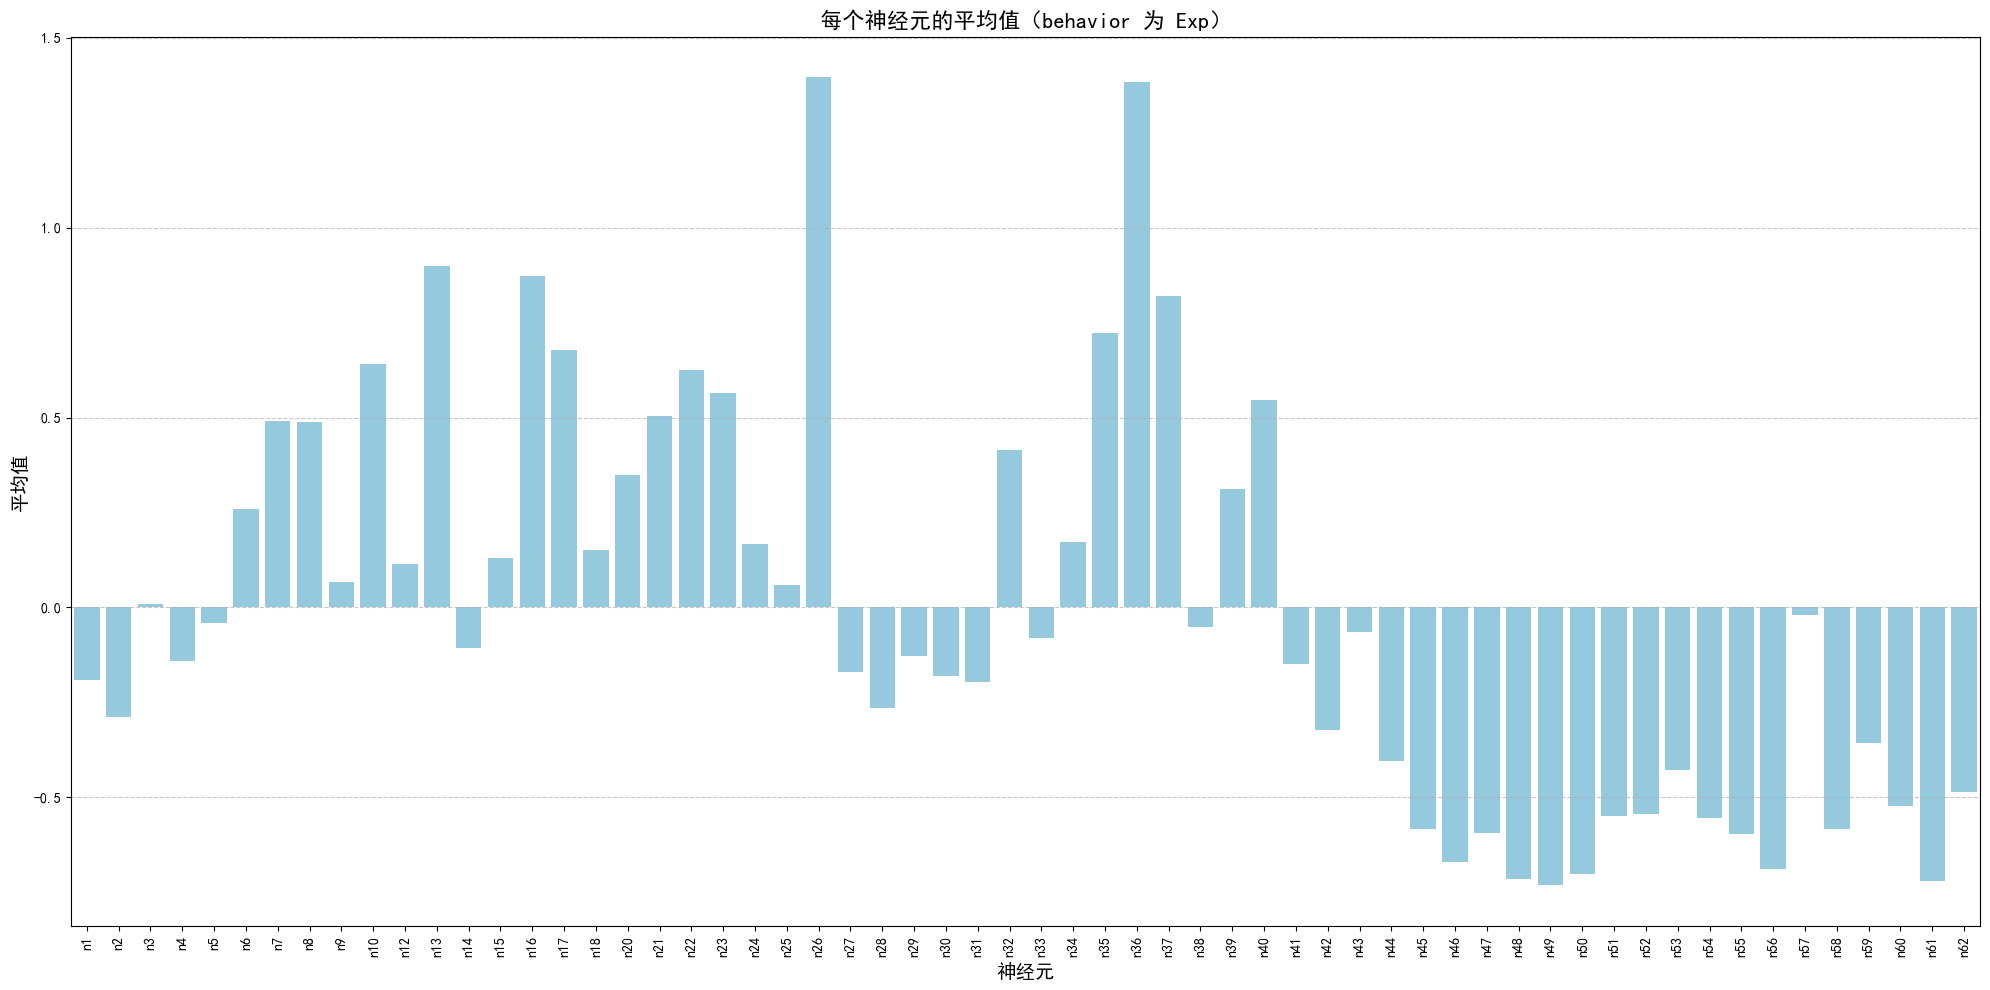

神经元分析完成。


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

# =======================
# 配置部分
# =======================

# Excel 文件路径（请根据实际情况修改）
excel_file_path = 'data.xlsx'

# 筛选后的结果保存路径（可选）
output_csv_path = 'neuron_means_Exp.csv'
output_chart_path = 'neuron_means_bar_chart_Exp.png'

# 选择使用的中文字体
# 常用字体包括 'SimHei', 'Microsoft YaHei', 'STSong', 'FangSong'
# 请确保所选字体已安装在系统中
chinese_font = 'SimHei'

# =======================
# 配置 Matplotlib 以支持中文
# =======================
matplotlib.rcParams['font.sans-serif'] = [chinese_font]  # 设置中文字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# =======================
# 步骤 1：读取 Excel 文件
# =======================
try:
    df = pd.read_excel(excel_file_path)
    print(f"成功读取文件：{excel_file_path}")
except FileNotFoundError:
    print(f"错误：文件 '{excel_file_path}' 未找到。请检查文件路径是否正确。")
    exit(1)
except Exception as e:
    print(f"读取 Excel 文件时发生错误：{e}")
    exit(1)

# =======================
# 步骤 2：筛选 behavior 为 'Exp' 的行
# =======================
# 确保 'behavior' 列存在
if 'behavior' not in df.columns:
    print("错误：数据中未找到 'behavior' 列。请检查列名是否正确。")
    exit(1)

# 筛选 'behavior' 为 'Exp' 的行
# 如果 'behavior' 的值可能存在大小写不一致，可以使用 str.lower() 进行统一
df_exp = df[df['behavior'] == 'Exp']
# 如果需要不区分大小写，可以使用以下代码：
# df_exp = df[df['behavior'].str.lower() == 'exp']

# 输出筛选结果
print(f"筛选前数据行数: {len(df)}")
print(f"筛选后数据行数: {len(df_exp)}")

# 检查是否有筛选后的数据
if df_exp.empty:
    print("警告：筛选后数据为空。请检查 'behavior' 列中的值是否包含 'Exp'。")
    exit(1)

# =======================
# 步骤 3：筛选神经元列
# =======================
# 假设神经元列为 'n1' 到 'n62'
neuron_columns = [f'n{i}' for i in range(1, 63)]

# 确保这些列存在于数据框中
available_neuron_columns = [col for col in neuron_columns if col in df_exp.columns]

# 输出缺失的神经元列（如果有）
missing_neuron_columns = set(neuron_columns) - set(available_neuron_columns)
if missing_neuron_columns:
    print(f"警告：以下神经元列在数据中未找到并将被忽略：{missing_neuron_columns}")

# 如果没有找到任何神经元列，退出程序
if not available_neuron_columns:
    print("错误：未找到任何神经元列。请检查列名是否正确。")
    exit(1)

print(f"使用的神经元列数：{len(available_neuron_columns)}")

# =======================
# 步骤 4：处理缺失值
# =======================
# 检查缺失值情况
missing_values = df_exp[available_neuron_columns].isnull().sum()
if missing_values.any():
    print("发现缺失值，将使用每列的均值进行填补。")
    # 用每列的均值填补缺失值
    df_exp[available_neuron_columns] = df_exp[available_neuron_columns].fillna(df_exp[available_neuron_columns].mean())
else:
    print("未发现缺失值。")

# =======================
# 步骤 5：计算每个神经元的平均值
# =======================
neuron_means = df_exp[available_neuron_columns].mean()
print("每个神经元的平均值计算完成。")

# =======================
# 步骤 6：保存平均值为 CSV（可选）
# =======================
try:
    neuron_means.to_csv(output_csv_path, header=['mean_value'])
    print(f"平均值已保存到 '{output_csv_path}'")
except Exception as e:
    print(f"保存平均值为 CSV 时发生错误：{e}")

# =======================
# 步骤 7：绘制柱状图
# =======================
plt.figure(figsize=(20, 10))

# 使用 Seaborn 绘制更美观的柱状图
# 首先，将 Series 转换为 DataFrame 并重置索引
neuron_means_df = neuron_means.reset_index()
neuron_means_df.columns = ['神经元', '平均值']

# 绘制柱状图，使用统一颜色以避免 FutureWarning
sns.barplot(x='神经元', y='平均值', data=neuron_means_df, color='skyblue')

# 添加标题和标签
plt.title('每个神经元的平均值（behavior 为 Exp）', fontsize=16)
plt.xlabel('神经元', fontsize=14)
plt.ylabel('平均值', fontsize=14)

# 显示网格线（可选）
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 旋转x轴标签以避免重叠
plt.xticks(rotation=90)

# 调整布局以适应所有标签
plt.tight_layout()

# 显示图形
plt.show()

# =======================
# 步骤 8：保存图表为图片文件（可选）
# =======================
# try:
#     # 创建新图形
#     plt.figure(figsize=(20, 10))
#     sns.barplot(x='神经元', y='平均值', data=neuron_means_df, color='skyblue')
#     plt.title('每个神经元的平均值（behavior 为 Exp）', fontsize=16)
#     plt.xlabel('神经元', fontsize=14)
#     plt.ylabel('平均值', fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.savefig(output_chart_path, dpi=300, bbox_inches='tight')
#     print(f"柱状图已保存到 '{output_chart_path}'")
# except Exception as e:
#     print(f"保存柱状图为图片时发生错误：{e}")

# =======================
# 完成
# =======================
print("神经元分析完成。")


成功读取文件：data.xlsx
Exp 数据行数: 2457
Gro 数据行数: 377
警告：以下神经元列在数据中未找到并将被忽略：{'n19', 'n11'}
使用的神经元列数：60
每个神经元的平均值计算完成。


C:\Users\czq20\AppData\Local\Temp\ipykernel_33292\2549480827.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp[available_neuron_columns] = df_exp[available_neuron_columns].fillna(df_exp[available_neuron_columns].mean())
C:\Users\czq20\AppData\Local\Temp\ipykernel_33292\2549480827.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gro[available_neuron_columns] = df_gro[available_neuron_columns].fillna(df_gro[available_neuron_columns].mean())


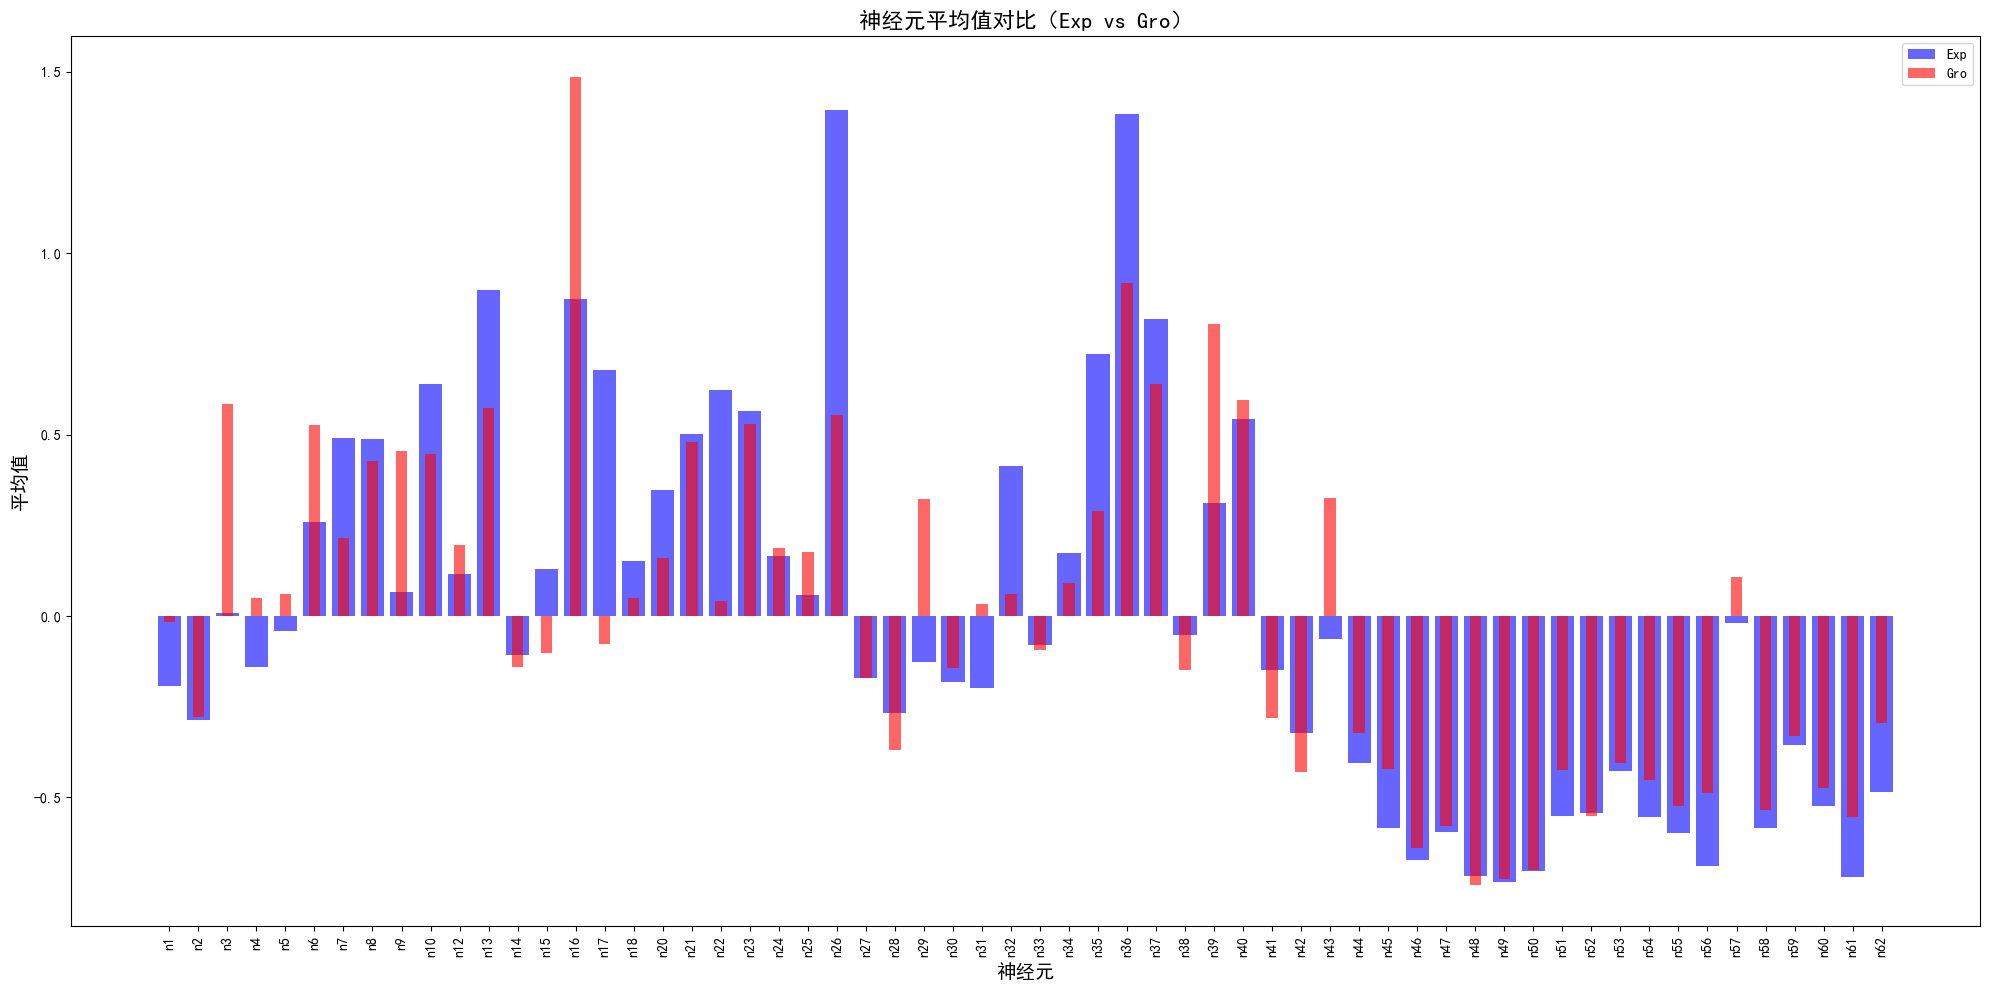

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# =======================
# 配置部分
# =======================

# Excel 文件路径（请根据实际情况修改）
excel_file_path = 'data.xlsx'

# 选择使用的中文字体
# 常用字体包括 'SimHei', 'Microsoft YaHei', 'STSong', 'FangSong'
# 请确保所选字体已安装在系统中
chinese_font = 'SimHei'

# =======================
# 配置 Matplotlib 以支持中文
# =======================
matplotlib.rcParams['font.sans-serif'] = [chinese_font]  # 设置中文字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# =======================
# 步骤 1：读取 Excel 文件
# =======================
try:
    df = pd.read_excel(excel_file_path)
    print(f"成功读取文件：{excel_file_path}")
except FileNotFoundError:
    print(f"错误：文件 '{excel_file_path}' 未找到。请检查文件路径是否正确。")
    exit(1)
except Exception as e:
    print(f"读取 Excel 文件时发生错误：{e}")
    exit(1)

# =======================
# 步骤 2：筛选 behavior 为 'Exp' 和 'Gro' 的行
# =======================
# 确保 'behavior' 列存在
if 'behavior' not in df.columns:
    print("错误：数据中未找到 'behavior' 列。请检查列名是否正确。")
    exit(1)

# 筛选 'behavior' 为 'Exp' 和 'Gro' 的行
df_exp = df[df['behavior'] == 'Exp']
df_gro = df[df['behavior'] == 'Gro']

# 输出筛选结果
print(f"Exp 数据行数: {len(df_exp)}")
print(f"Gro 数据行数: {len(df_gro)}")

# 检查是否有筛选后的数据
if df_exp.empty or df_gro.empty:
    print("警告：筛选后的数据为空，请检查 'behavior' 列中的值是否包含 'Exp' 和 'Gro'。")
    exit(1)

# =======================
# 步骤 3：筛选神经元列
# =======================
# 假设神经元列为 'n1' 到 'n62'
neuron_columns = [f'n{i}' for i in range(1, 63)]

# 确保这些列存在于数据框中
available_neuron_columns = [col for col in neuron_columns if col in df.columns]

# 输出缺失的神经元列（如果有）
missing_neuron_columns = set(neuron_columns) - set(available_neuron_columns)
if missing_neuron_columns:
    print(f"警告：以下神经元列在数据中未找到并将被忽略：{missing_neuron_columns}")

# 如果没有找到任何神经元列，退出程序
if not available_neuron_columns:
    print("错误：未找到任何神经元列。请检查列名是否正确。")
    exit(1)

print(f"使用的神经元列数：{len(available_neuron_columns)}")

# =======================
# 步骤 4：处理缺失值
# =======================
# 填补缺失值
df_exp[available_neuron_columns] = df_exp[available_neuron_columns].fillna(df_exp[available_neuron_columns].mean())
df_gro[available_neuron_columns] = df_gro[available_neuron_columns].fillna(df_gro[available_neuron_columns].mean())

# =======================
# 步骤 5：计算每个神经元的平均值
# =======================
exp_means = df_exp[available_neuron_columns].mean()
gro_means = df_gro[available_neuron_columns].mean()

print("每个神经元的平均值计算完成。")

# =======================
# 步骤 6：绘制对比柱状图
# =======================
# 将平均值转换为 DataFrame 并重置索引
exp_means_df = exp_means.reset_index()
exp_means_df.columns = ['神经元', 'Exp 平均值']

gro_means_df = gro_means.reset_index()
gro_means_df.columns = ['神经元', 'Gro 平均值']

# 合并 Exp 和 Gro 的平均值
merged_df = pd.merge(exp_means_df, gro_means_df, on='神经元')

# 设置图形大小
plt.figure(figsize=(20, 10))

# 绘制 Exp 的柱状图（蓝色）
plt.bar(merged_df['神经元'], merged_df['Exp 平均值'], color='blue', alpha=0.6, label='Exp')

# 绘制 Gro 的柱状图（红色）
plt.bar(merged_df['神经元'], merged_df['Gro 平均值'], color='red', alpha=0.6, label='Gro', width=0.4)

# 添加标题和标签
plt.title('神经元平均值对比（Exp vs Gro）', fontsize=16)
plt.xlabel('神经元', fontsize=14)
plt.ylabel('平均值', fontsize=14)

# 添加图例
plt.legend()

# 旋转 x 轴标签以避免重叠
plt.xticks(rotation=90)

# 调整布局并显示图形
plt.tight_layout()
plt.show()


成功读取文件：data.xlsx
Exp 数据行数: 377
Gro 数据行数: 113
警告：以下神经元列在数据中未找到并将被忽略：{'n19', 'n11'}
使用的神经元列数：60
每个神经元的平均值计算完成。


C:\Users\czq20\AppData\Local\Temp\ipykernel_33292\2162241830.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp[available_neuron_columns] = df_exp[available_neuron_columns].fillna(df_exp[available_neuron_columns].mean())
C:\Users\czq20\AppData\Local\Temp\ipykernel_33292\2162241830.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gro[available_neuron_columns] = df_gro[available_neuron_columns].fillna(df_gro[available_neuron_columns].mean())


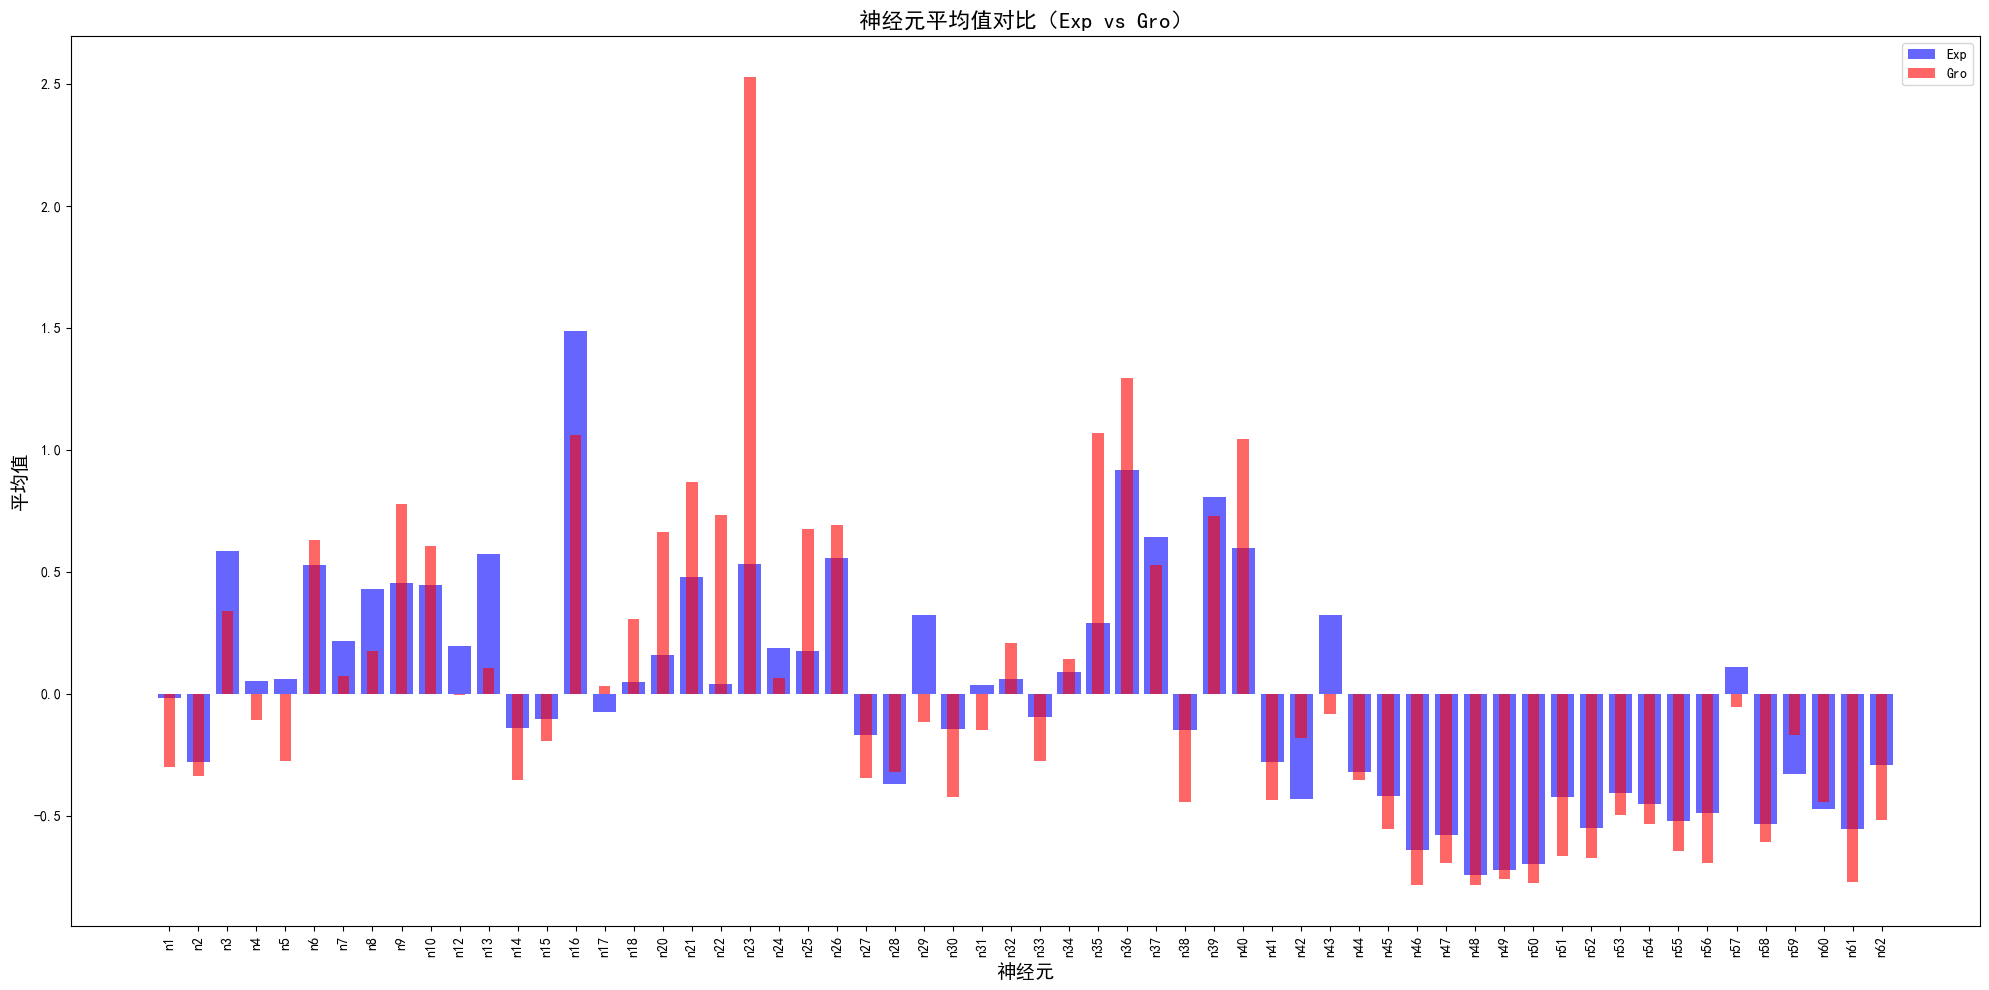

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# =======================
# 配置部分
# =======================

# Excel 文件路径（请根据实际情况修改）
excel_file_path = 'data.xlsx'

# 选择使用的中文字体
# 常用字体包括 'SimHei', 'Microsoft YaHei', 'STSong', 'FangSong'
# 请确保所选字体已安装在系统中
chinese_font = 'SimHei'

# =======================
# 配置 Matplotlib 以支持中文
# =======================
matplotlib.rcParams['font.sans-serif'] = [chinese_font]  # 设置中文字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# =======================
# 步骤 1：读取 Excel 文件
# =======================
try:
    df = pd.read_excel(excel_file_path)
    print(f"成功读取文件：{excel_file_path}")
except FileNotFoundError:
    print(f"错误：文件 '{excel_file_path}' 未找到。请检查文件路径是否正确。")
    exit(1)
except Exception as e:
    print(f"读取 Excel 文件时发生错误：{e}")
    exit(1)

# =======================
# 步骤 2：筛选 behavior 为 'Exp' 和 'Gro' 的行
# =======================
# 确保 'behavior' 列存在
if 'behavior' not in df.columns:
    print("错误：数据中未找到 'behavior' 列。请检查列名是否正确。")
    exit(1)

# 筛选 'behavior' 为 'Exp' 和 'Gro' 的行
df_exp = df[df['behavior'] == 'Gro']
df_gro = df[df['behavior'] == 'Trem']

# 输出筛选结果
print(f"Exp 数据行数: {len(df_exp)}")
print(f"Gro 数据行数: {len(df_gro)}")

# 检查是否有筛选后的数据
if df_exp.empty or df_gro.empty:
    print("警告：筛选后的数据为空，请检查 'behavior' 列中的值是否包含 'Exp' 和 'Gro'。")
    exit(1)

# =======================
# 步骤 3：筛选神经元列
# =======================
# 假设神经元列为 'n1' 到 'n62'
neuron_columns = [f'n{i}' for i in range(1, 63)]

# 确保这些列存在于数据框中
available_neuron_columns = [col for col in neuron_columns if col in df.columns]

# 输出缺失的神经元列（如果有）
missing_neuron_columns = set(neuron_columns) - set(available_neuron_columns)
if missing_neuron_columns:
    print(f"警告：以下神经元列在数据中未找到并将被忽略：{missing_neuron_columns}")

# 如果没有找到任何神经元列，退出程序
if not available_neuron_columns:
    print("错误：未找到任何神经元列。请检查列名是否正确。")
    exit(1)

print(f"使用的神经元列数：{len(available_neuron_columns)}")

# =======================
# 步骤 4：处理缺失值
# =======================
# 填补缺失值
df_exp[available_neuron_columns] = df_exp[available_neuron_columns].fillna(df_exp[available_neuron_columns].mean())
df_gro[available_neuron_columns] = df_gro[available_neuron_columns].fillna(df_gro[available_neuron_columns].mean())

# =======================
# 步骤 5：计算每个神经元的平均值
# =======================
exp_means = df_exp[available_neuron_columns].mean()
gro_means = df_gro[available_neuron_columns].mean()

print("每个神经元的平均值计算完成。")

# =======================
# 步骤 6：绘制对比柱状图
# =======================
# 将平均值转换为 DataFrame 并重置索引
exp_means_df = exp_means.reset_index()
exp_means_df.columns = ['神经元', 'Exp 平均值']

gro_means_df = gro_means.reset_index()
gro_means_df.columns = ['神经元', 'Gro 平均值']

# 合并 Exp 和 Gro 的平均值
merged_df = pd.merge(exp_means_df, gro_means_df, on='神经元')

# 设置图形大小
plt.figure(figsize=(20, 10))

# 绘制 Exp 的柱状图（蓝色）
plt.bar(merged_df['神经元'], merged_df['Exp 平均值'], color='blue', alpha=0.6, label='Exp')

# 绘制 Gro 的柱状图（红色）
plt.bar(merged_df['神经元'], merged_df['Gro 平均值'], color='red', alpha=0.6, label='Gro', width=0.4)

# 添加标题和标签
plt.title('神经元平均值对比（Exp vs Gro）', fontsize=16)
plt.xlabel('神经元', fontsize=14)
plt.ylabel('平均值', fontsize=14)

# 添加图例
plt.legend()

# 旋转 x 轴标签以避免重叠
plt.xticks(rotation=90)

# 调整布局并显示图形
plt.tight_layout()
plt.show()


成功读取文件：data.xlsx
使用的神经元列数：60


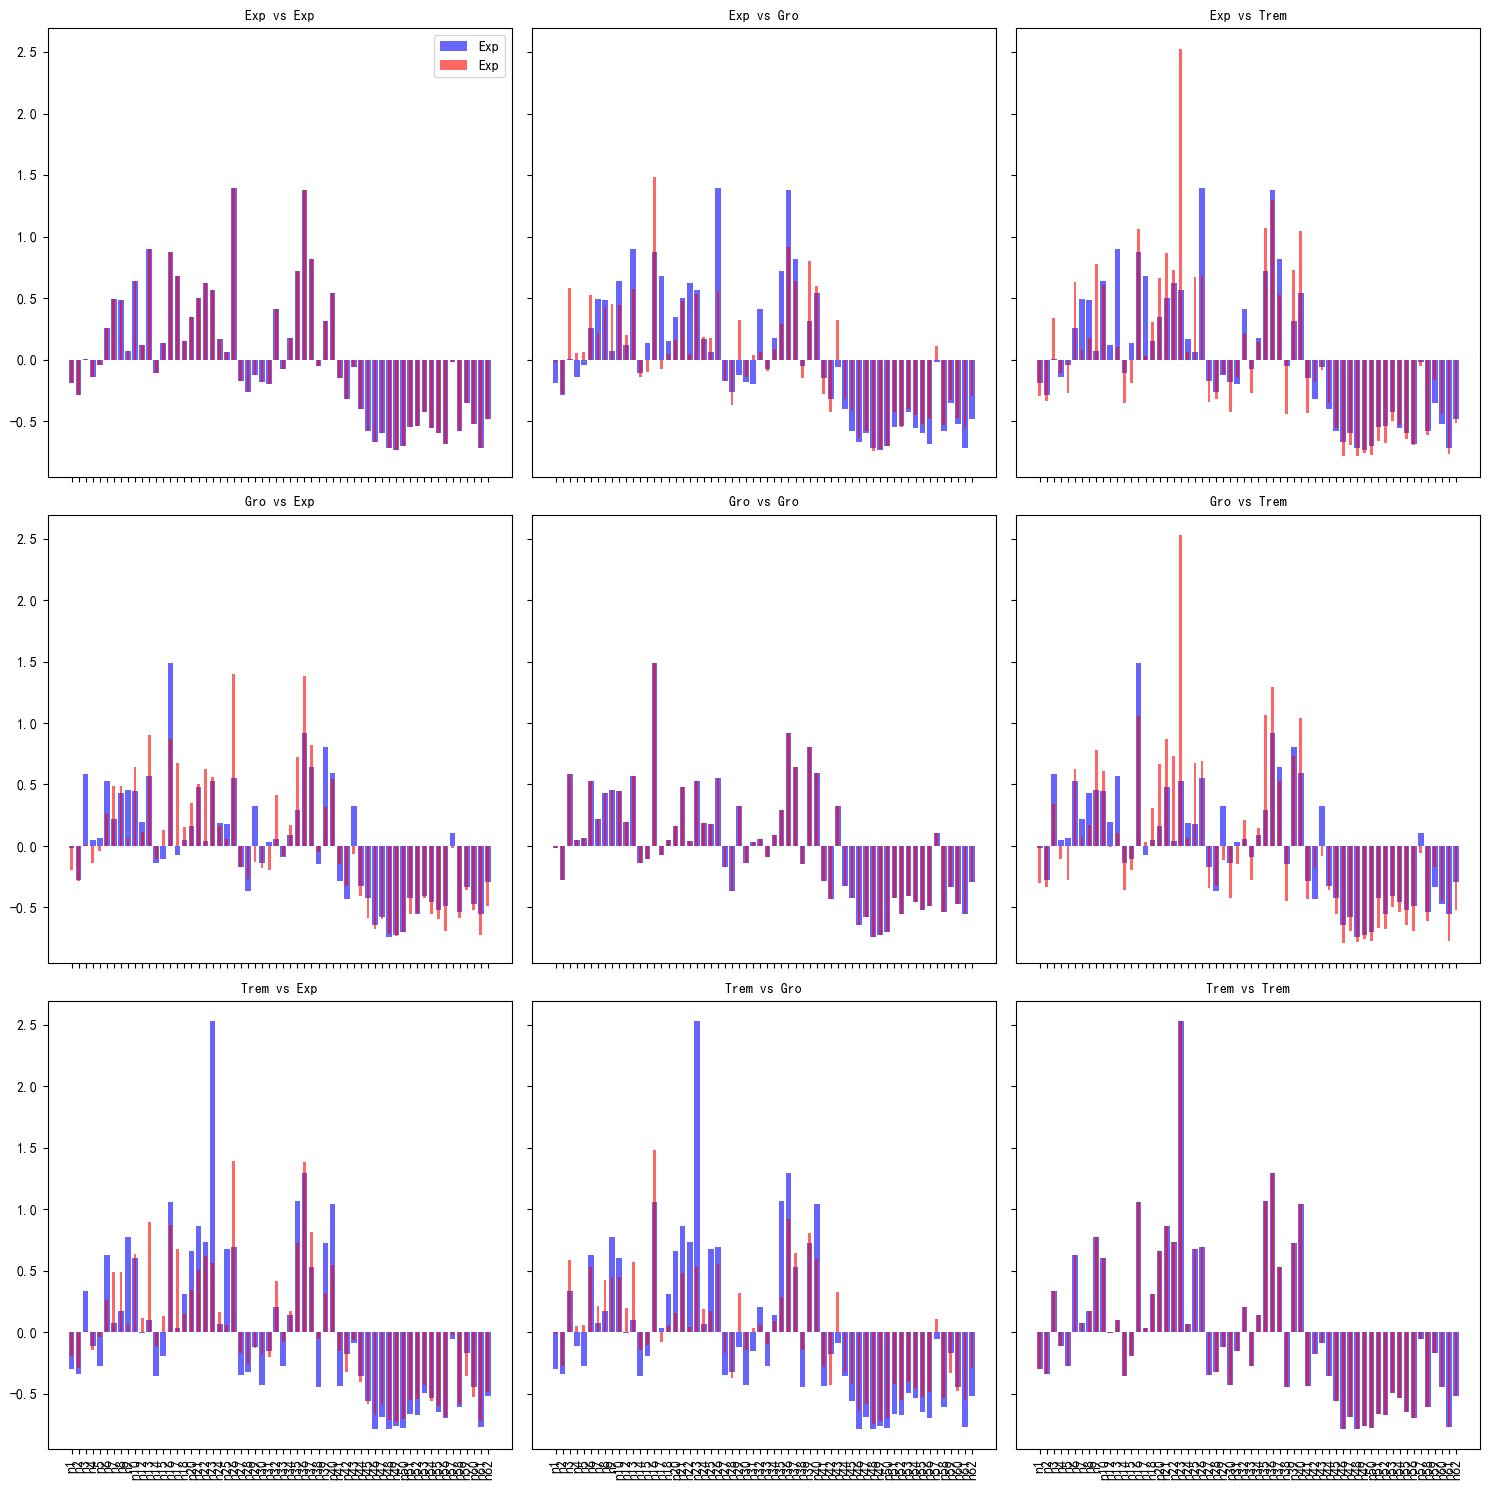

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# 配置部分
# =======================

# Excel 文件路径（请根据实际情况修改）
excel_file_path = 'data.xlsx'

# 选择使用的中文字体
# 常用字体包括 'SimHei', 'Microsoft YaHei', 'STSong', 'FangSong'
# 请确保所选字体已安装在系统中
chinese_font = 'SimHei'

# =======================
# 配置 Matplotlib 以支持中文
# =======================
plt.rcParams['font.sans-serif'] = [chinese_font]  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# =======================
# 步骤 1：读取 Excel 文件
# =======================
try:
    df = pd.read_excel(excel_file_path)
    print(f"成功读取文件：{excel_file_path}")
except FileNotFoundError:
    print(f"错误：文件 '{excel_file_path}' 未找到。请检查文件路径是否正确。")
    exit(1)
except Exception as e:
    print(f"读取 Excel 文件时发生错误：{e}")
    exit(1)

# =======================
# 步骤 2：筛选 behavior 数据
# =======================
# 确保 'behavior' 列存在
if 'behavior' not in df.columns:
    print("错误：数据中未找到 'behavior' 列。请检查列名是否正确。")
    exit(1)

# 筛选目标 behavior 的数据
target_behaviors = ['Exp', 'Gro', 'Trem']
df_filtered = df[df['behavior'].isin(target_behaviors)]

# 检查数据
if df_filtered.empty:
    print("警告：筛选后的数据为空，请检查 'behavior' 列中的值是否包含目标值。")
    exit(1)

# =======================
# 步骤 3：筛选神经元列
# =======================
# 假设神经元列为 'n1' 到 'n62'
neuron_columns = [f'n{i}' for i in range(1, 63)]

# 确保这些列存在于数据框中
available_neuron_columns = [col for col in neuron_columns if col in df.columns]

if not available_neuron_columns:
    print("错误：未找到任何神经元列。请检查列名是否正确。")
    exit(1)

print(f"使用的神经元列数：{len(available_neuron_columns)}")

# =======================
# 步骤 4：计算每个 behavior 的神经元平均值
# =======================
# 计算每个 behavior 的平均值
behavior_means = df_filtered.groupby('behavior')[available_neuron_columns].mean()

# =======================
# 步骤 5：绘制二维矩阵对比柱状图
# =======================
# 设置子图网格大小
num_behaviors = len(target_behaviors)
fig, axes = plt.subplots(num_behaviors, num_behaviors, figsize=(15, 15), sharex=True, sharey=True)

# 遍历每个 behavior 的组合
for i, row_behavior in enumerate(target_behaviors):
    for j, col_behavior in enumerate(target_behaviors):
        ax = axes[i, j]

        # 获取对应 behavior 的平均值
        row_means = behavior_means.loc[row_behavior]
        col_means = behavior_means.loc[col_behavior]

        # 创建 DataFrame 用于对比
        comparison_df = pd.DataFrame({
            '神经元': available_neuron_columns,
            f'{row_behavior} 平均值': row_means,
            f'{col_behavior} 平均值': col_means
        })

        # 绘制对比柱状图
        ax.bar(comparison_df['神经元'], comparison_df[f'{row_behavior} 平均值'], color='blue', alpha=0.6,
               label=row_behavior)
        ax.bar(comparison_df['神经元'], comparison_df[f'{col_behavior} 平均值'], color='red', alpha=0.6,
               label=col_behavior, width=0.4)

        # 设置标题
        ax.set_title(f'{row_behavior} vs {col_behavior}', fontsize=10)
        ax.tick_params(axis='x', rotation=90)

        # 添加图例，仅在第一行第一列添加
        if i == 0 and j == 0:
            ax.legend()

# 调整布局
plt.tight_layout()
plt.show()


成功读取文件：data.xlsx
使用的神经元列数：60


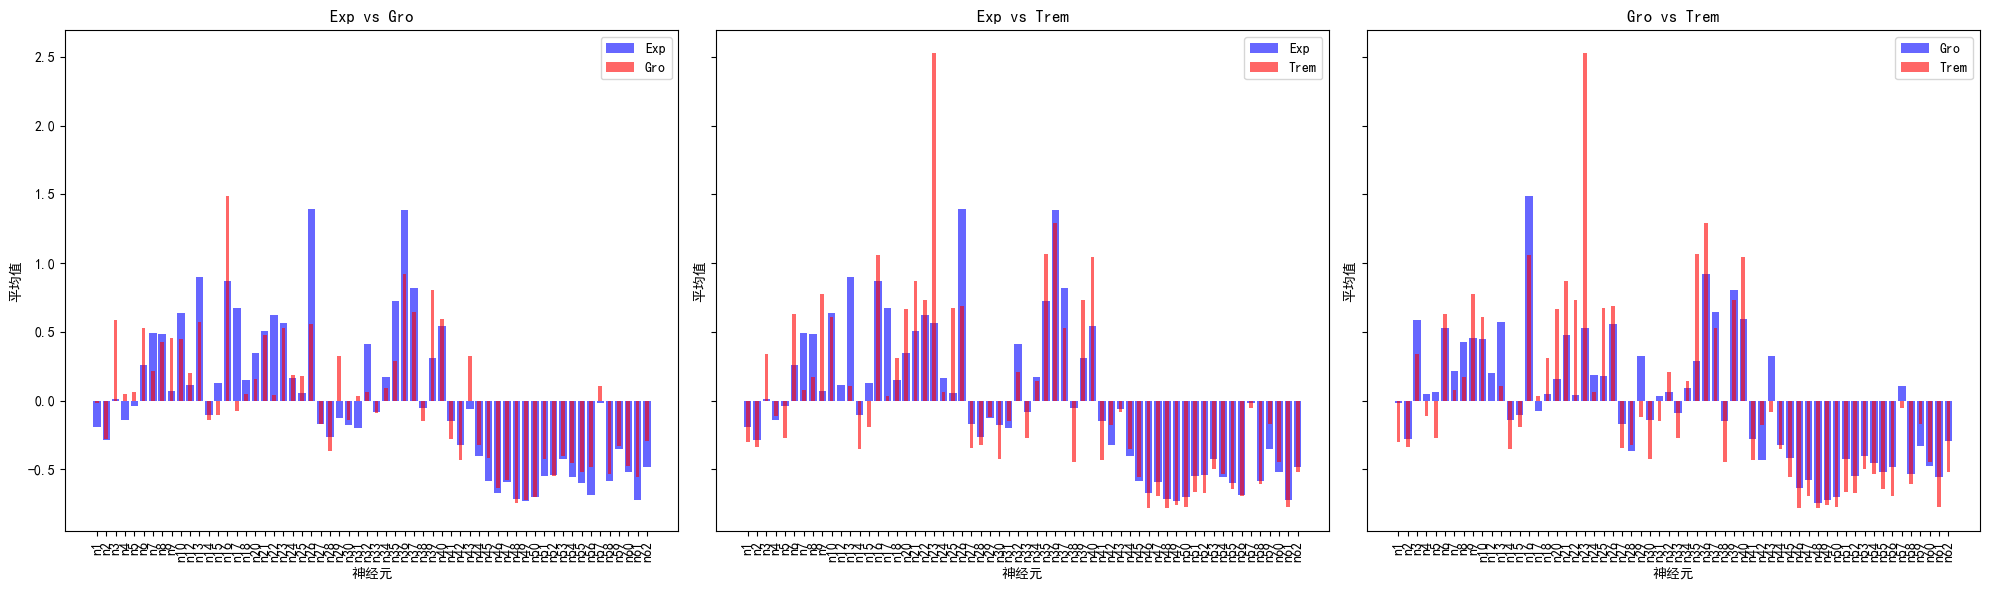

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# 配置部分
# =======================

# Excel 文件路径（请根据实际情况修改）
excel_file_path = 'data.xlsx'

# 选择使用的中文字体
# 常用字体包括 'SimHei', 'Microsoft YaHei', 'STSong', 'FangSong'
# 请确保所选字体已安装在系统中
chinese_font = 'SimHei'

# =======================
# 配置 Matplotlib 以支持中文
# =======================
plt.rcParams['font.sans-serif'] = [chinese_font]  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# =======================
# 步骤 1：读取 Excel 文件
# =======================
try:
    df = pd.read_excel(excel_file_path)
    print(f"成功读取文件：{excel_file_path}")
except FileNotFoundError:
    print(f"错误：文件 '{excel_file_path}' 未找到。请检查文件路径是否正确。")
    exit(1)
except Exception as e:
    print(f"读取 Excel 文件时发生错误：{e}")
    exit(1)

# =======================
# 步骤 2：筛选 behavior 数据
# =======================
# 确保 'behavior' 列存在
if 'behavior' not in df.columns:
    print("错误：数据中未找到 'behavior' 列。请检查列名是否正确。")
    exit(1)

# 筛选目标 behavior 的数据
target_behaviors = ['Exp', 'Gro', 'Trem']
df_filtered = df[df['behavior'].isin(target_behaviors)]

# 检查数据
if df_filtered.empty:
    print("警告：筛选后的数据为空，请检查 'behavior' 列中的值是否包含目标值。")
    exit(1)

# =======================
# 步骤 3：筛选神经元列
# =======================
# 假设神经元列为 'n1' 到 'n62'
neuron_columns = [f'n{i}' for i in range(1, 63)]

# 确保这些列存在于数据框中
available_neuron_columns = [col for col in neuron_columns if col in df.columns]

if not available_neuron_columns:
    print("错误：未找到任何神经元列。请检查列名是否正确。")
    exit(1)

print(f"使用的神经元列数：{len(available_neuron_columns)}")

# =======================
# 步骤 4：计算每个 behavior 的神经元平均值
# =======================
# 计算每个 behavior 的平均值
behavior_means = df_filtered.groupby('behavior')[available_neuron_columns].mean()

# =======================
# 步骤 5：绘制一行三图的对比柱状图
# =======================
# 定义对比组合
comparison_pairs = [('Exp', 'Gro'), ('Exp', 'Trem'), ('Gro', 'Trem')]

# 设置图形大小
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# 遍历对比组合并绘制柱状图
for idx, (row_behavior, col_behavior) in enumerate(comparison_pairs):
    ax = axes[idx]

    # 获取对应 behavior 的平均值
    row_means = behavior_means.loc[row_behavior]
    col_means = behavior_means.loc[col_behavior]

    # 创建 DataFrame 用于对比
    comparison_df = pd.DataFrame({
        '神经元': available_neuron_columns,
        f'{row_behavior} 平均值': row_means,
        f'{col_behavior} 平均值': col_means
    })

    # 绘制对比柱状图
    ax.bar(comparison_df['神经元'], comparison_df[f'{row_behavior} 平均值'], color='blue', alpha=0.6,
           label=row_behavior)
    ax.bar(comparison_df['神经元'], comparison_df[f'{col_behavior} 平均值'], color='red', alpha=0.6, label=col_behavior,
           width=0.4)

    # 设置标题
    ax.set_title(f'{row_behavior} vs {col_behavior}', fontsize=12)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('神经元', fontsize=10)
    ax.set_ylabel('平均值', fontsize=10)

    # 添加图例
    ax.legend()

# 调整布局
plt.tight_layout()
plt.show()


成功读取文件：data.xlsx
使用的神经元列数：60


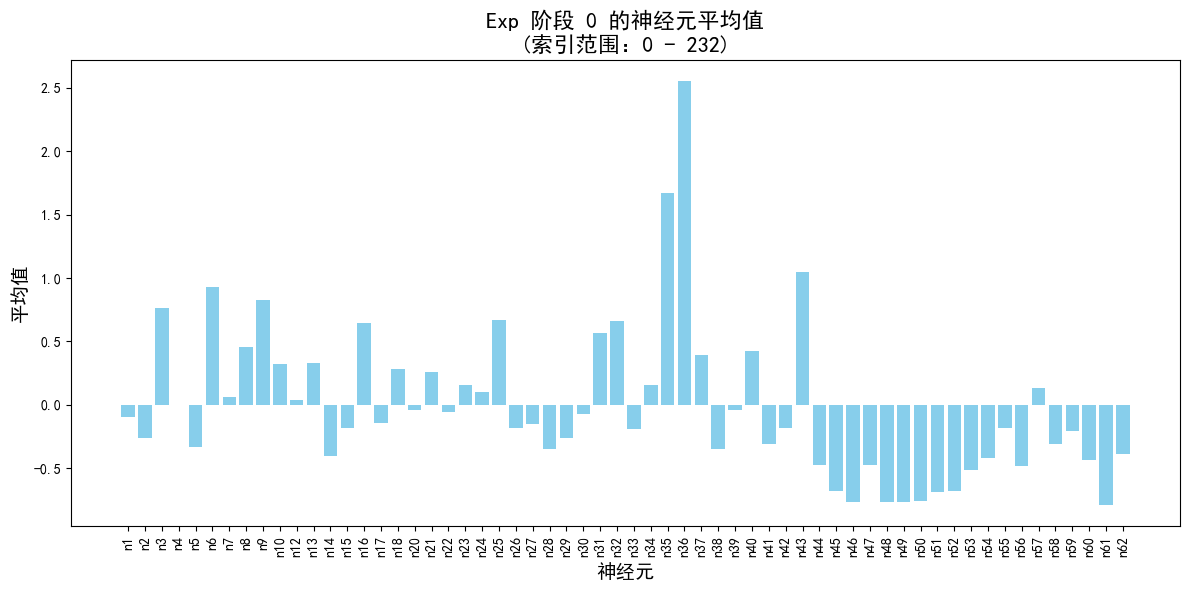

完成 Exp 阶段 0 的柱状图绘制


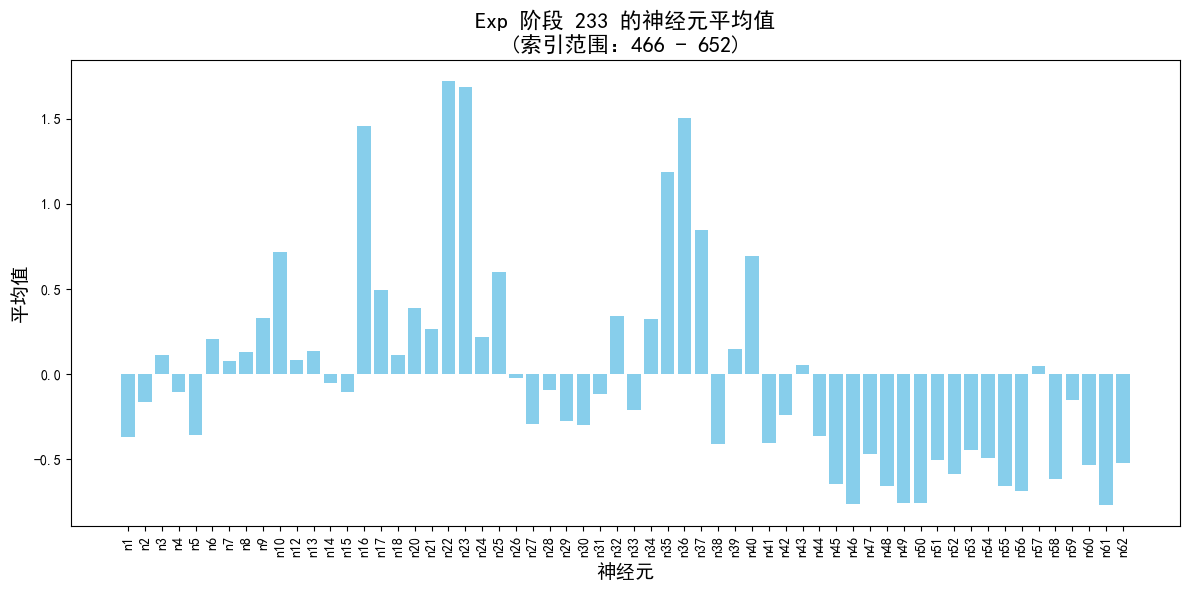

完成 Exp 阶段 233 的柱状图绘制


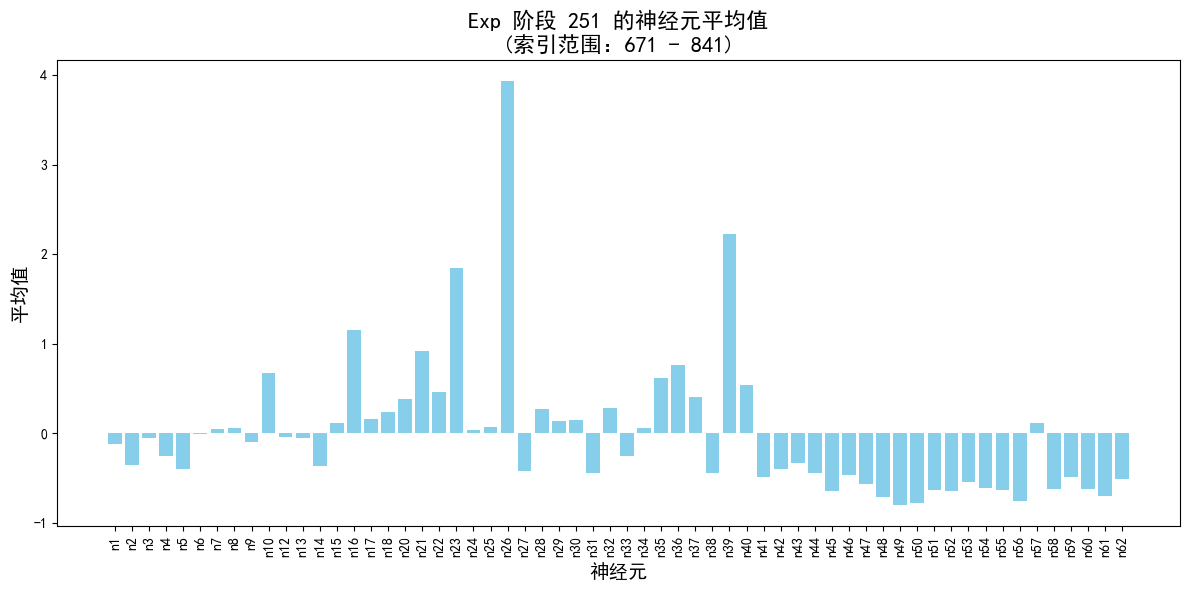

完成 Exp 阶段 251 的柱状图绘制


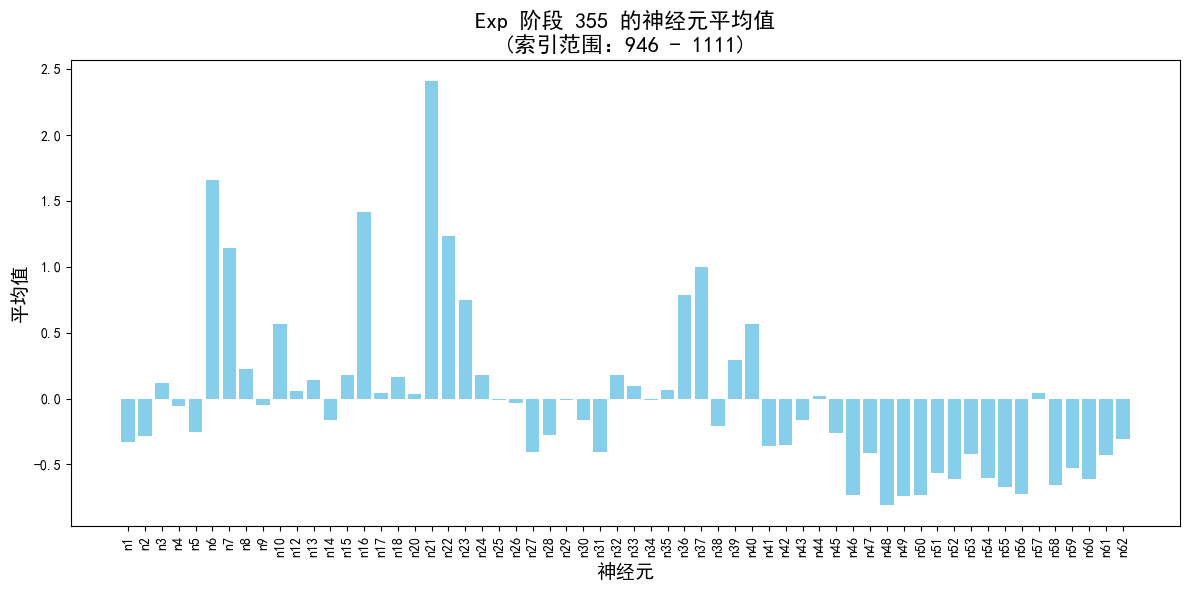

完成 Exp 阶段 355 的柱状图绘制


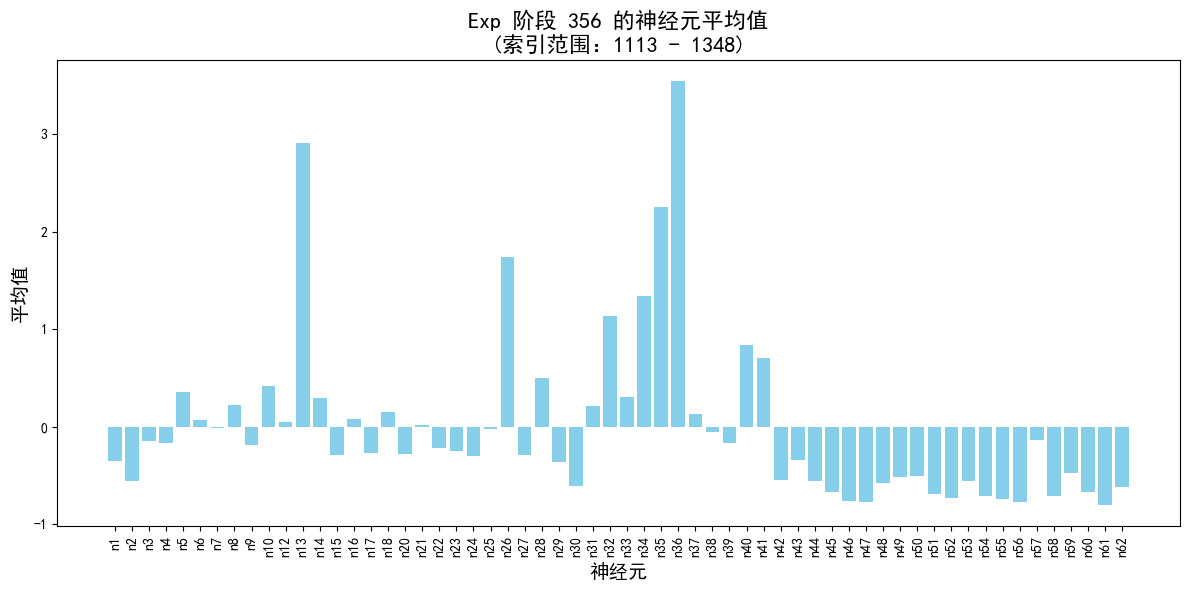

完成 Exp 阶段 356 的柱状图绘制


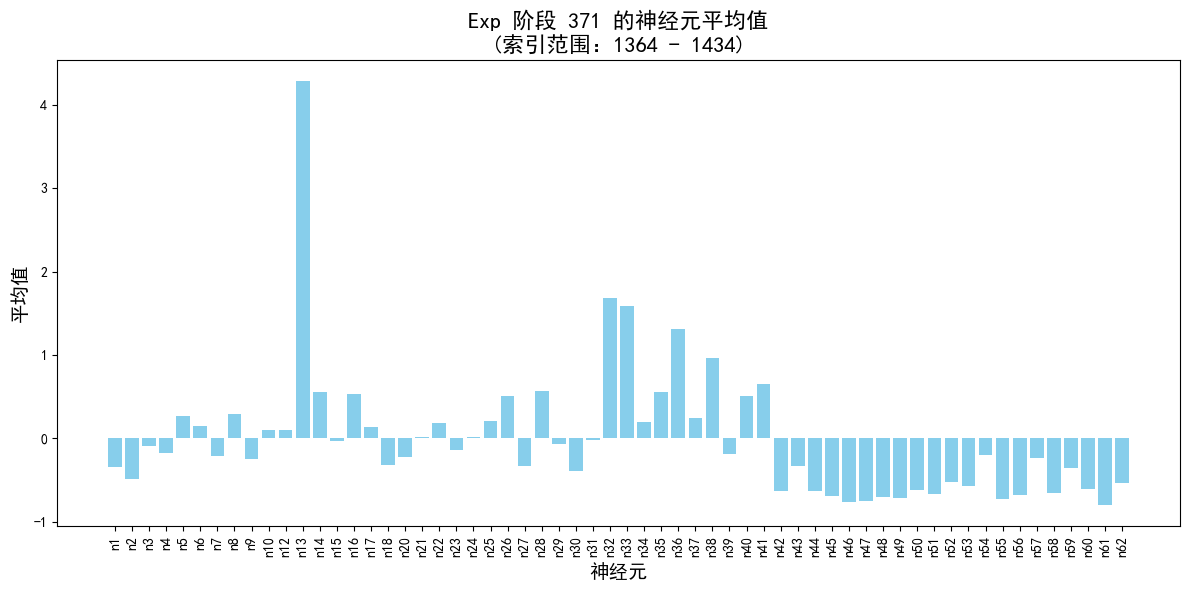

完成 Exp 阶段 371 的柱状图绘制


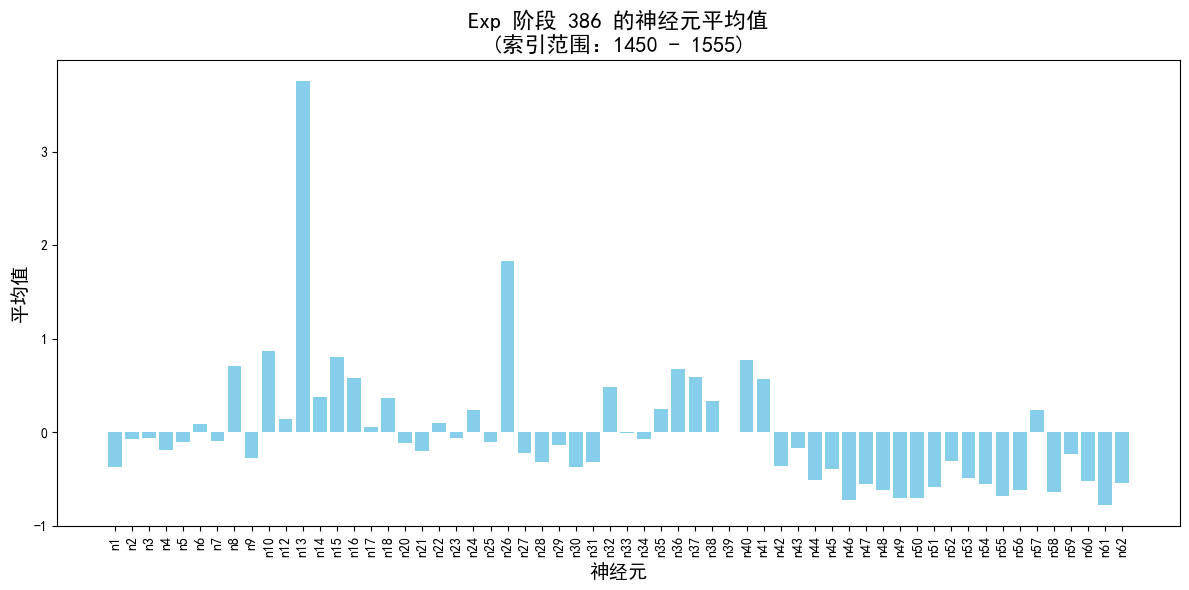

完成 Exp 阶段 386 的柱状图绘制


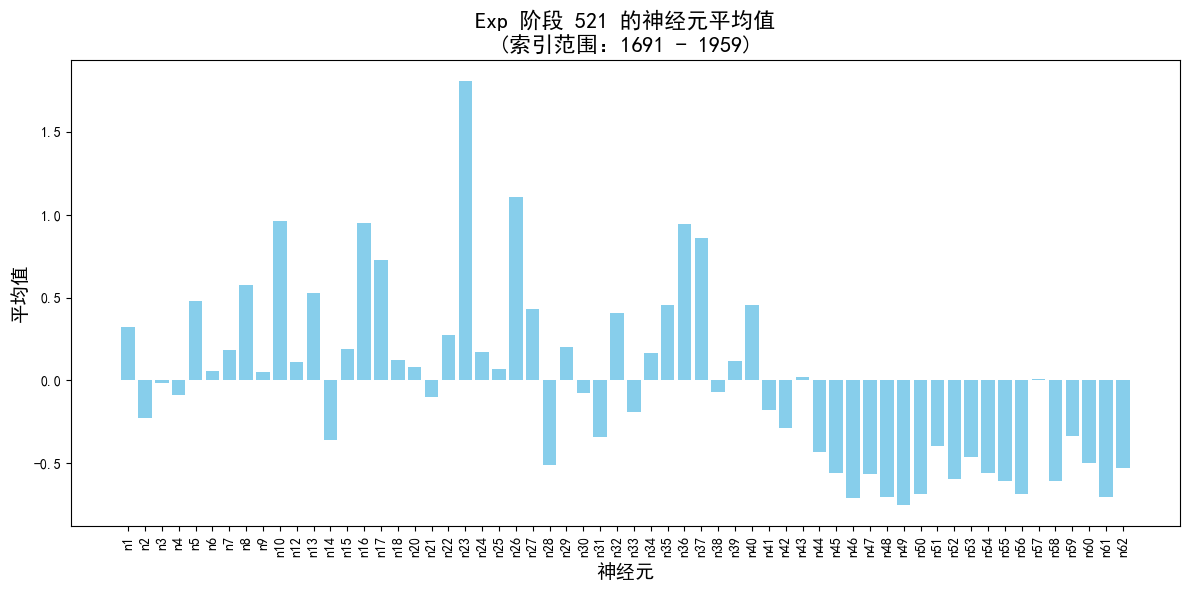

完成 Exp 阶段 521 的柱状图绘制


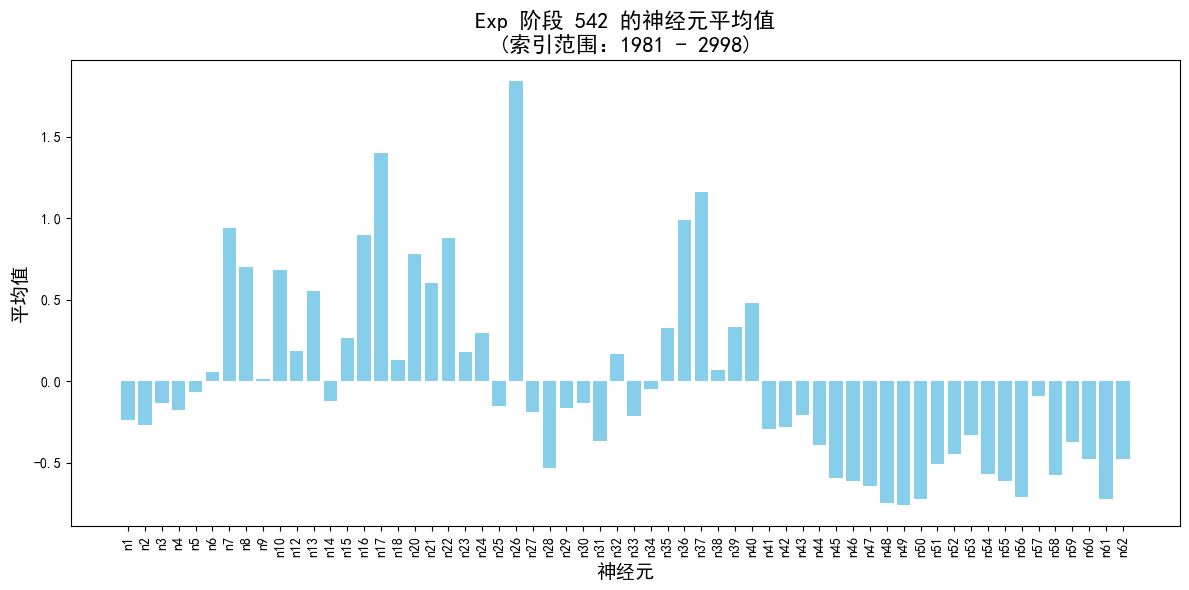

完成 Exp 阶段 542 的柱状图绘制


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# 配置部分
# =======================

# Excel 文件路径（请根据实际情况修改）
excel_file_path = 'data.xlsx'

# 选择使用的中文字体
chinese_font = 'SimHei'

# =======================
# 配置 Matplotlib 以支持中文
# =======================
plt.rcParams['font.sans-serif'] = [chinese_font]  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False        # 解决负号显示问题

# =======================
# 步骤 1：读取 Excel 文件
# =======================
try:
    df = pd.read_excel(excel_file_path)
    print(f"成功读取文件：{excel_file_path}")
except FileNotFoundError:
    print(f"错误：文件 '{excel_file_path}' 未找到。请检查文件路径是否正确。")
    exit(1)
except Exception as e:
    print(f"读取 Excel 文件时发生错误：{e}")
    exit(1)

# =======================
# 步骤 2：标识连续的 Exp 阶段
# =======================
# 确保 'behavior' 列存在
if 'behavior' not in df.columns:
    print("错误：数据中未找到 'behavior' 列。请检查列名是否正确。")
    exit(1)

# 创建一个组号，每遇到非 Exp 时递增，确保所有连续的 Exp 被分为一个组
df['Exp_Group'] = (df['behavior'] != 'Exp').cumsum()

# 仅保留 Exp 阶段的数据
df_exp = df[df['behavior'] == 'Exp']

# 分组统计连续 Exp 段落的标识
exp_groups = df_exp.groupby('Exp_Group')

# =======================
# 步骤 3：筛选神经元列
# =======================
# 假设神经元列为 'n1' 到 'n62'
neuron_columns = [f'n{i}' for i in range(1, 63)]

# 确保这些列存在于数据框中
available_neuron_columns = [col for col in neuron_columns if col in df.columns]

if not available_neuron_columns:
    print("错误：未找到任何神经元列。请检查列名是否正确。")
    exit(1)

print(f"使用的神经元列数：{len(available_neuron_columns)}")

# =======================
# 步骤 4：计算每组 Exp 阶段的平均值并绘制柱状图
# =======================
# 遍历每个 Exp 阶段
for group_id, group_data in exp_groups:
    # 计算当前阶段的平均值
    group_means = group_data[available_neuron_columns].mean()

    # 获取当前阶段的起始和结束索引
    start_index = group_data.index.min()
    end_index = group_data.index.max()

    # 设置图形大小
    plt.figure(figsize=(12, 6))

    # 绘制柱状图
    plt.bar(group_means.index, group_means.values, color='skyblue')

    # 添加图表信息
    plt.title(f'Exp 阶段 {group_id} 的神经元平均值\n(索引范围：{start_index} - {end_index})', fontsize=16)
    plt.xlabel('神经元', fontsize=14)
    plt.ylabel('平均值', fontsize=14)
    plt.xticks(rotation=90, fontsize=10)

    # 调整布局
    plt.tight_layout()

    # 显示图形
    plt.show()

    # 可选：保存图表
    # plt.savefig(f'exp_group_{group_id}_bar_chart.png', dpi=300, bbox_inches='tight')
    print(f"完成 Exp 阶段 {group_id} 的柱状图绘制")
